In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train, y_train), (X_test, y_test)= keras.datasets.mnist.load_data()
print(len(X_train))
print(len(X_test))
print(X_train[0].shape)

60000
10000
(28, 28)


5


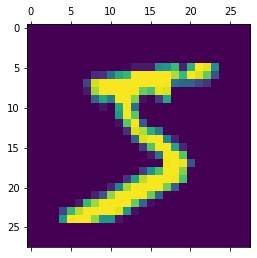

In [5]:
print(y_train[0])
plt.matshow(X_train[0])

## Since accuracy was below 50, we may want to reshape our numbers to 0-1

In [6]:
X_train = X_train / 255
X_test = X_test / 255

## We need to reshape our 2d array into 1 dimensional array(from 2 columns to 1)
1. From 28x28 to 784

In [7]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

X_train_flattened.shape                       

(60000, 784)

In [8]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Let's create a simple neurol network for now

In [14]:
%%time
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 962us/step - loss: 0.4720 - accuracy: 0.8746
Epoch 2/5
1875/1875 [==============================] - 2s 934us/step - loss: 0.3042 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 2s 911us/step - loss: 0.2834 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 2s 911us/step - loss: 0.2737 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 2s 922us/step - loss: 0.2664 - accuracy: 0.9260


## Evaluate the data to get
1. Loss
1. Accuracy

In [15]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 760us/step - loss: 0.2669 - accuracy: 0.9262


[0.2668556571006775, 0.9261999726295471]

In [16]:
y_predicted = model.predict(X_test_flattened)
y_predicted[:5]

array([[2.4587095e-02, 4.1716936e-07, 5.2373320e-02, 9.4337773e-01,
        1.6084909e-03, 9.1861129e-02, 1.2662430e-06, 9.9973452e-01,
        7.2426498e-02, 5.8539915e-01],
       [3.6182559e-01, 5.5094659e-03, 9.9939072e-01, 3.1038287e-01,
        4.6887710e-10, 8.6757720e-01, 8.2940876e-01, 8.8264303e-13,
        1.0048461e-01, 1.3352073e-09],
       [4.1323900e-04, 9.9413681e-01, 6.4307708e-01, 2.9427880e-01,
        2.4581432e-02, 1.0984129e-01, 1.3745385e-01, 1.1792919e-01,
        3.5404068e-01, 5.1223069e-02],
       [9.9962735e-01, 3.1553189e-08, 1.0125694e-01, 7.5000525e-03,
        4.9159116e-05, 1.5668872e-01, 1.0130012e-01, 1.6006142e-02,
        1.9903839e-02, 1.0893345e-02],
       [6.3365966e-02, 3.9891289e-05, 1.3832313e-01, 4.2584538e-03,
        9.8963368e-01, 1.7050415e-02, 1.4387789e-01, 2.3103201e-01,
        3.0111122e-01, 6.3999504e-01]], dtype=float32)

## Convert float numbers to whole numbers 

In [ ]:
predicted_labels = [np.argmax(i) for i in y_predicted] 
predicted_labels[:5]

In [ ]:
tf.math.confusion_matrix(labels=y_test,predictions=predicted_labels)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

print(ConfusionMatrixDisplay.from_predictions(y_test,predicted_labels))

## Let's add a hidden layer to up the performance
1. The more hidden layers you have the longer it'd take

In [ ]:
%%time
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


model.compile(
    optimizer='adam', ## another optimized SGD
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

H = model.fit(X_train_flattened,y_train,epochs=38,batch_size=128, validation_data=(X_test_flattened, y_test),) # adjust batch size, epochs

In [ ]:
model.evaluate(X_test_flattened, y_test)

## Yay, it improved by 5 percent

## Let's graph the history that we get from our model.fit

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 38), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 38), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 38), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 38), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
y_predicted = model.predict(X_test_flattened,batch_size=128) # batch size isn't a required parameter, but it might make things faster (processing wise)
predicted_labels = [np.argmax(i) for i in y_predicted] 


print(ConfusionMatrixDisplay.from_predictions(y_test,predicted_labels))

## How to optimize 
1. Adjust batch sizes,epochs, add amount of layers

## If you don't want to flatten the array, Keras comes with a hidden layer for that

In [18]:
%%time
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # flattens it here (supply an image shape)
    keras.layers.Dense(100, activation='relu'), # no need to specify shape here now, it'd do it on its own
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# not flattened now
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2737 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1205 - accuracy: 0.9648
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0837 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0649 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0521 - accuracy: 0.9839
Wall time: 11.2 s


In [19]:
model.evaluate(X_test, y_test) # not flattened

313/313 [==============================] - 0s 871us/step - loss: 0.0851 - accuracy: 0.9735


[0.08510109782218933, 0.9735000133514404]

## Same result!

## Always shoot for the high accuracy. 
1. 92% might have been great 20 years ago, but with such powerful tools like CNN we can easily get 98,99%

## Activate a certain CPU/GPU

print(tf.config.list_physical_devices())

In [24]:
%%time
with tf.device("CPU:0"): # this Line
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)), # flattens it here (supply an image shape)
        keras.layers.Dense(100, activation='relu'), # no need to specify shape here now, it'd do it on its own
        keras.layers.Dense(10, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam', 
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # not flattened now
    model.fit(X_train,y_train,epochs=5)
    

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2764 - accuracy: 0.9218
Epoch 2/5
1875/1875 [==============================] - 2s 980us/step - loss: 0.1273 - accuracy: 0.9625
Epoch 3/5
1875/1875 [==============================] - 2s 952us/step - loss: 0.0896 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0698 - accuracy: 0.9785
Epoch 5/5
1875/1875 [==============================] - 2s 954us/step - loss: 0.0537 - accuracy: 0.98400s - loss: 0.0539 - accuracy: 0.
Wall time: 11.6 s


## How to use table in md
| Age | Weight |
|:----|:-----|
| 5 | 30 |
| 6 | 45 |
| 7 | 60 |
| 8 | 75 |